<h1> Подраздел 1.6 <span class="tocSkip"></span></h1>

<h1> Задание <span class="tocSkip"></span></h1>

Используя датасет https://www.kaggle.com/datasets/andrewmvd/data-engineer-jobs:

- Построить график компаний с самым большим кол-вом вакансий
- Построить график самых популярный названий в вакансиях
- Построить график самых популярных местоположений вакансий по их численности и построить круговую диаграмму
- Построить график популярности по колонке Type of ownership, относительно численности вакансий
- Построить график популярности по секторам работы
- Построить график используя сектора работы и средний уровень зарплат в них
- Построить гистограмму распределения рейтинга компаний
- Построить график средних зарплат по популярным компаниям
- Построить из описаний вакансий облако тегов, исследовать самые популярные слова

В графиках использовать основные цвета сайта hh.ru

# Загрузка  данных

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.dpi'] = 140

import re

!pip install wordcloud
from wordcloud import WordCloud

from collections import Counter

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Загрузим данные

df = pd.read_csv("DataEngineer.csv")

df.head(3)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1


Приведем все колонки к змеиному регистру. 

In [3]:
df.columns = [re.sub(r"(\w)([A-Z])", r"\1 \2", col) for col in df.columns]
df.columns = df.columns.str.lower().str.replace(' ','_')
df.columns

Index(['job_title', 'salary_estimate', 'job_description', 'rating',
       'company_name', 'location', 'headquarters', 'size', 'founded',
       'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors',
       'easy_apply'],
      dtype='object')

In [4]:
# Проверим пропущенные значения
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

Похоже, пропусков нет. 

In [5]:
df.isna().mean()

job_title            0.0
salary_estimate      0.0
job_description      0.0
rating               0.0
company_name         0.0
location             0.0
headquarters         0.0
size                 0.0
founded              0.0
type_of_ownership    0.0
industry             0.0
sector               0.0
revenue              0.0
competitors          0.0
easy_apply           0.0
dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   job_title          2528 non-null   object 
 1   salary_estimate    2528 non-null   object 
 2   job_description    2528 non-null   object 
 3   rating             2528 non-null   float64
 4   company_name       2528 non-null   object 
 5   location           2528 non-null   object 
 6   headquarters       2528 non-null   object 
 7   size               2528 non-null   object 
 8   founded            2528 non-null   int64  
 9   type_of_ownership  2528 non-null   object 
 10  industry           2528 non-null   object 
 11  sector             2528 non-null   object 
 12  revenue            2528 non-null   object 
 13  competitors        2528 non-null   object 
 14  easy_apply         2528 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 296.4+ KB


# Визуализация

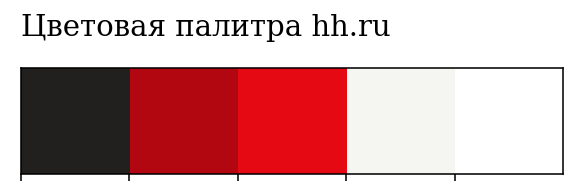

In [7]:
sns.palplot(['#221f1f', '#b20710', '#e50914','#f5f5f1', '#ffffff'])

plt.title("Цветовая палитра hh.ru",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

Создадим вспомогательный столбец.

In [8]:
df['count'] = 1

## График компаний с самым большим количеством вакансий

Для начала уберем из названий компаний попавшие туда значения рейтинга

In [9]:
df['company_name'] = df['company_name'].str.split("\n", 1, expand=True)[0]

Построим красивый график

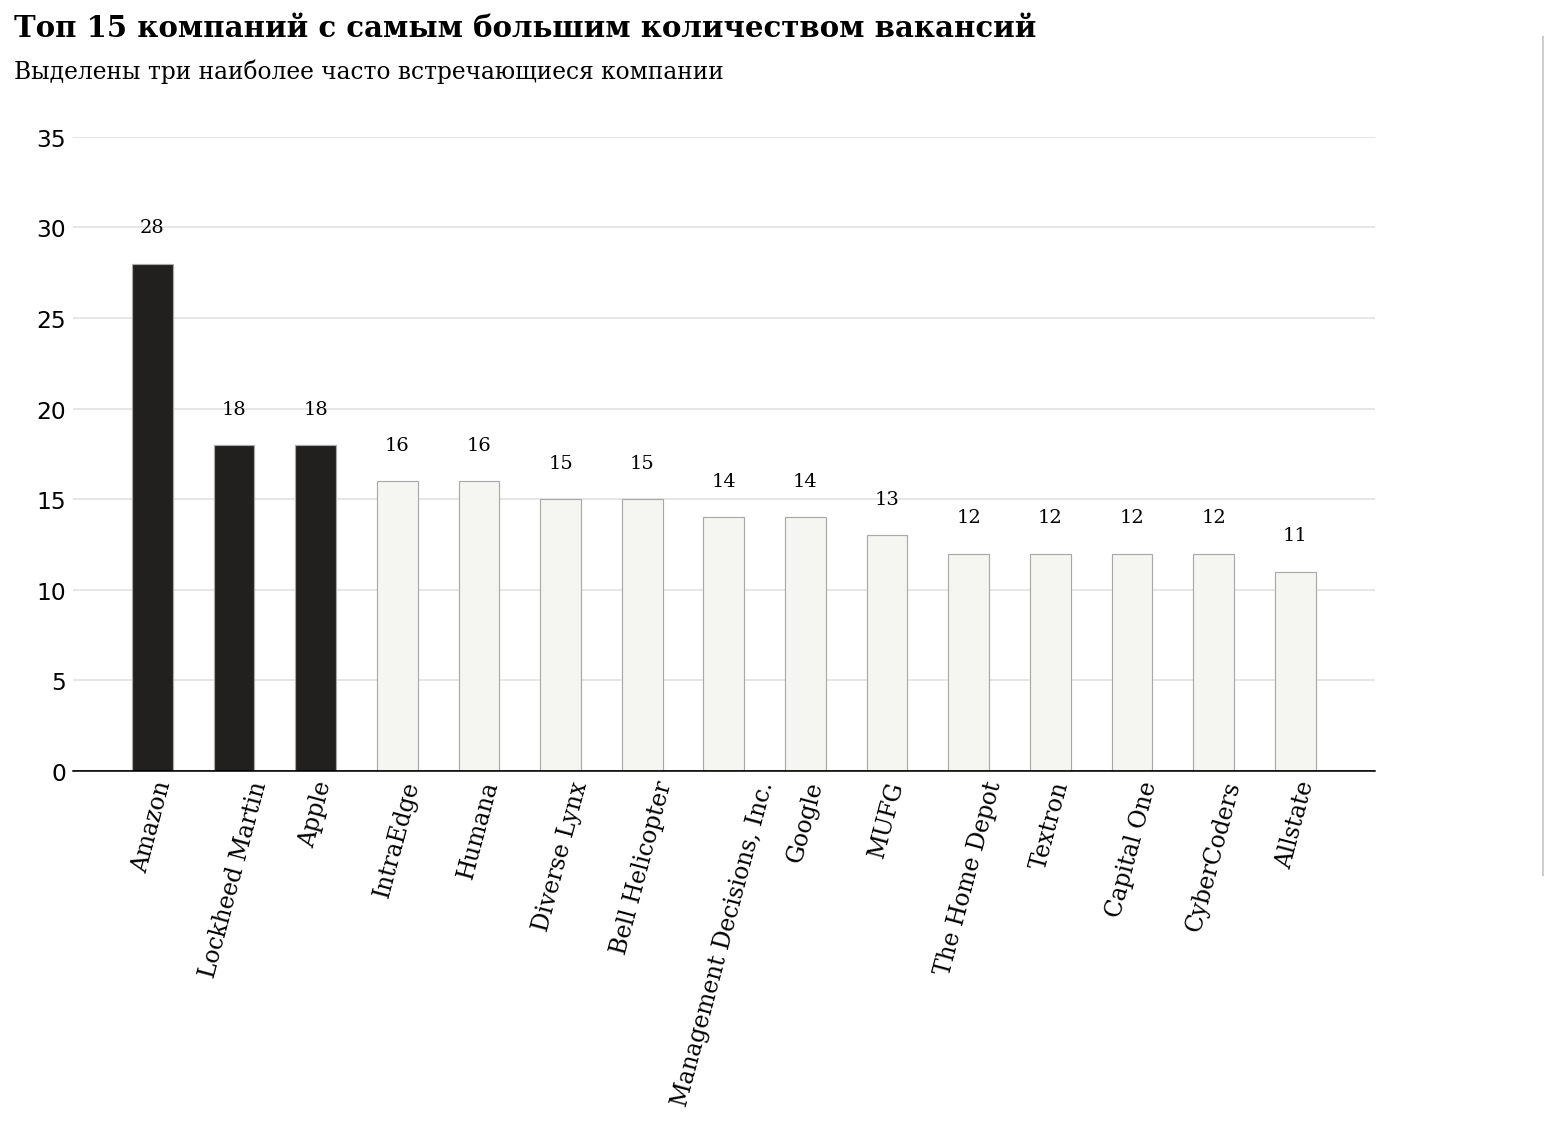

In [10]:
data = df.groupby('company_name')['count'].sum().sort_values(ascending=False).head(15)

color_map = ['#f5f5f1' for _ in range(15)]
color_map[0] = color_map[1] = color_map[2] =  '#221f1f' 

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 2), 
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    

ax.set_xticklabels(data.index, fontfamily='serif', rotation=75)


fig.text(0.09, 1, 'Топ 15 компаний с самым большим количеством вакансий', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Выделены три наиболее часто встречающиеся компании', fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 40, 5) 
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)

l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()


## График самых популярных названий в вакансиях

Выведем список 15 популярных вакансий. 

In [11]:
data = pd.DataFrame(df['job_title'].value_counts().head(10))
data

,job_title
Data Engineer,469
Senior Data Engineer,103
Software Engineer,93
Big Data Engineer,73
Sr. Data Engineer,35
Machine Learning Engineer,17
Data Engineer II,16
Data Warehouse Engineer,14
Systems Engineer,13
Data Platform Engineer,13


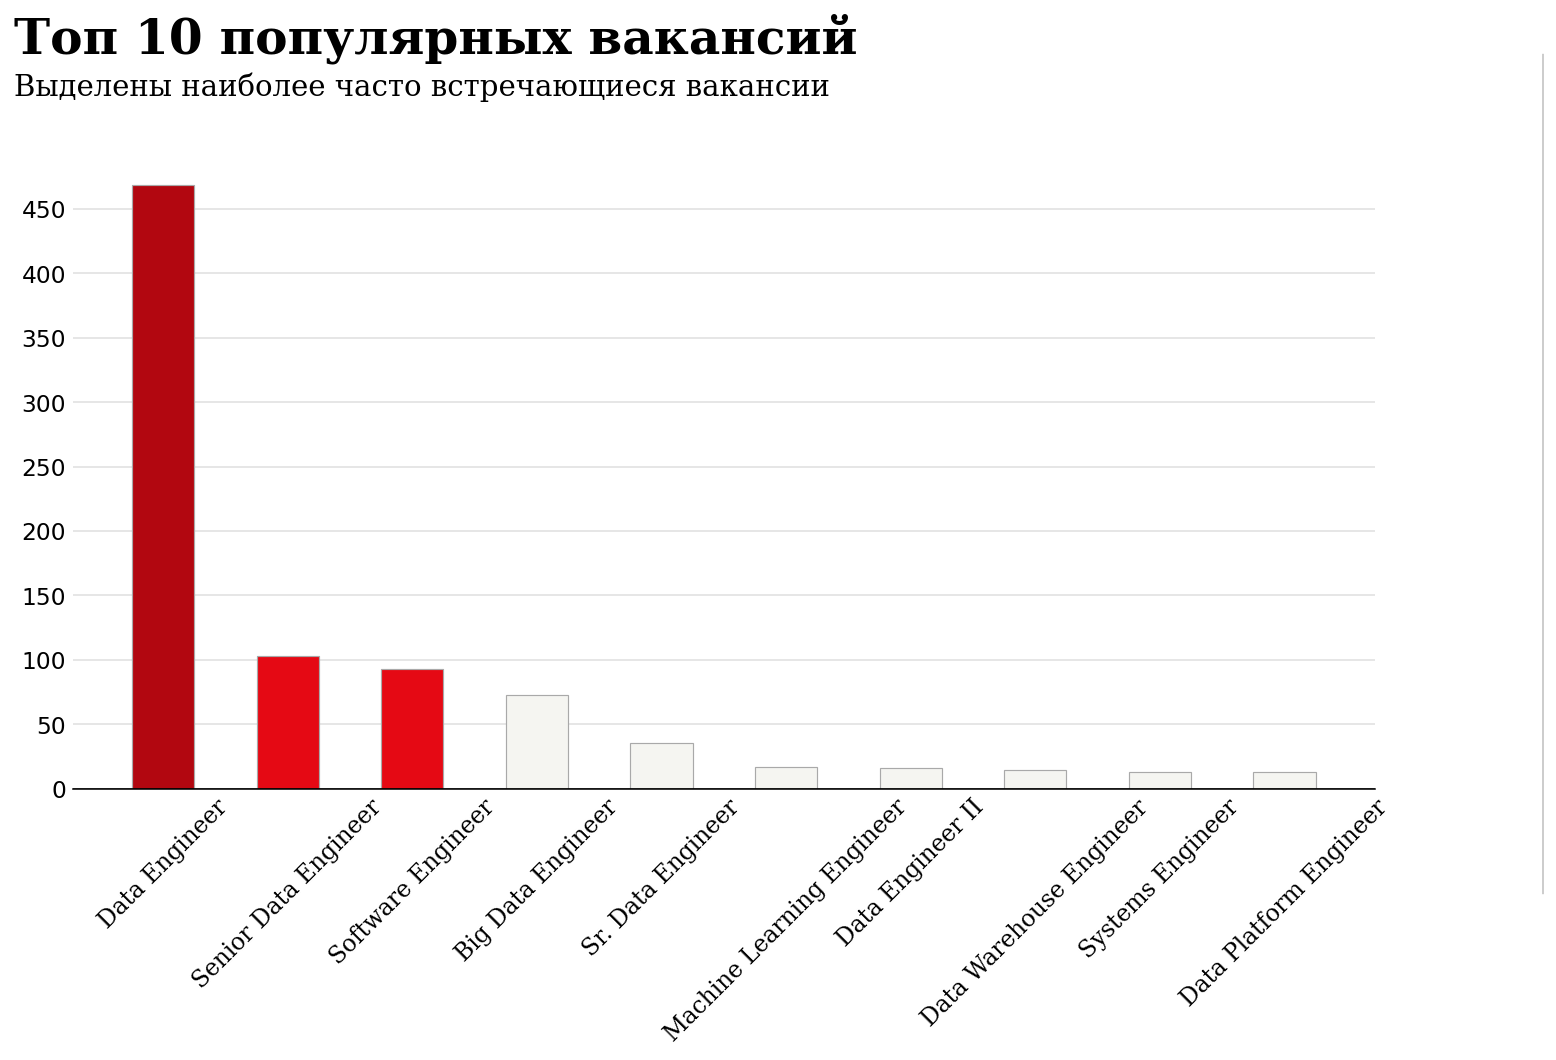

In [12]:
data = df['job_title'].value_counts().head(10)

color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = '#b20710'
color_map[1] = color_map[2] =  '#e50914' 

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)


for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
ax.set_xticklabels(data.index, fontfamily='serif', rotation=45)

fig.text(0.09, 1, 'Топ 10 популярных вакансий', fontsize=25, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Выделены наиболее часто встречающиеся вакансии', fontsize=15, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 500, 50) 
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)


l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

Видим, что Data Engineer - наше все. Хотя, скорее всего ,это общее название и в целом, данные распределения не обязательно являются верными. 

## График самых популярных местоположений вакансий по их численности

Выведем 10 самых частых местоположений. 

In [13]:
data = pd.DataFrame(df.groupby('location')['count'].sum().sort_values(ascending=False).head(10))
data.sort_index

<bound method DataFrame.sort_index of                   count
location               
Austin, TX          199
Houston, TX         199
San Diego, CA       195
Chicago, IL         192
San Antonio, TX     190
New York, NY        187
Philadelphia, PA    135
Jacksonville, FL    122
Phoenix, AZ         117
Los Angeles, CA     106>

Построим круговую диаграмму с количеством вакансий в зависисомсти от местоположения.

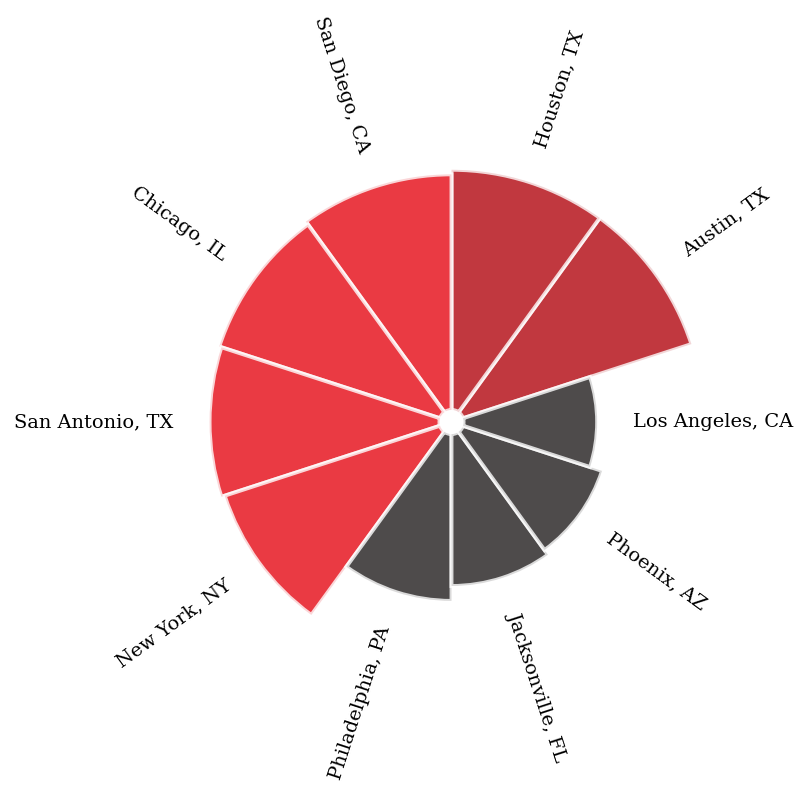

In [14]:
data_sub2 = data


data_sub2['Value'] = data_sub2['count']
data_sub2 = data_sub2.reset_index()
df_polar = data_sub2.sort_index()


color_map = ['#221f1f' for _ in range(12)]
color_map[0] = color_map[1] =  '#b20710' # color highlight
color_map[2] = color_map[3] = color_map[4] = color_map[5] =  '#e50914' 

plt.figure(figsize=(5,5))
ax = plt.subplot(111, polar=True)
plt.axis('off')


upperLimit = 30
lowerLimit = 10
labelPadding = 30

max = df_polar['Value'].max()

slope = (max - lowerLimit) / max
heights = slope * df_polar.Value + lowerLimit

width = 2*np.pi / len(df_polar.index)

indexes = list(range(1, len(df_polar.index)+1))
angles = [element * width for element in indexes]
angles

bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color=color_map,alpha=0.8
)

for bar, angle, height, label in zip(bars,angles, heights, df_polar['location']):

    rotation = np.rad2deg(angle)

    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
        
          

    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, fontsize=10,fontfamily='serif',
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 


## График популярности по колонке Type of ownership, относительно численности вакансий


In [15]:
df.groupby('type_of_ownership')['count'].sum().sort_values(ascending=False)

type_of_ownership
Company - Private                 1392
Company - Public                   754
Subsidiary or Business Segment     126
-1                                 119
Nonprofit Organization              48
Unknown                             30
Government                          21
College / University                13
Contract                            10
Private Practice / Firm              6
Other Organization                   4
Hospital                             3
School / School District             1
Self-employed                        1
Name: count, dtype: int64

Не нравится значение "-1". Заменим его на Unknown 

In [16]:
df['type_of_ownership'] = df['type_of_ownership'].replace('-1', 'Unknown')

Проверим корректность

In [17]:
df.groupby('type_of_ownership')['count'].sum().sort_values(ascending=False)

type_of_ownership
Company - Private                 1392
Company - Public                   754
Unknown                            149
Subsidiary or Business Segment     126
Nonprofit Organization              48
Government                          21
College / University                13
Contract                            10
Private Practice / Firm              6
Other Organization                   4
Hospital                             3
School / School District             1
Self-employed                        1
Name: count, dtype: int64

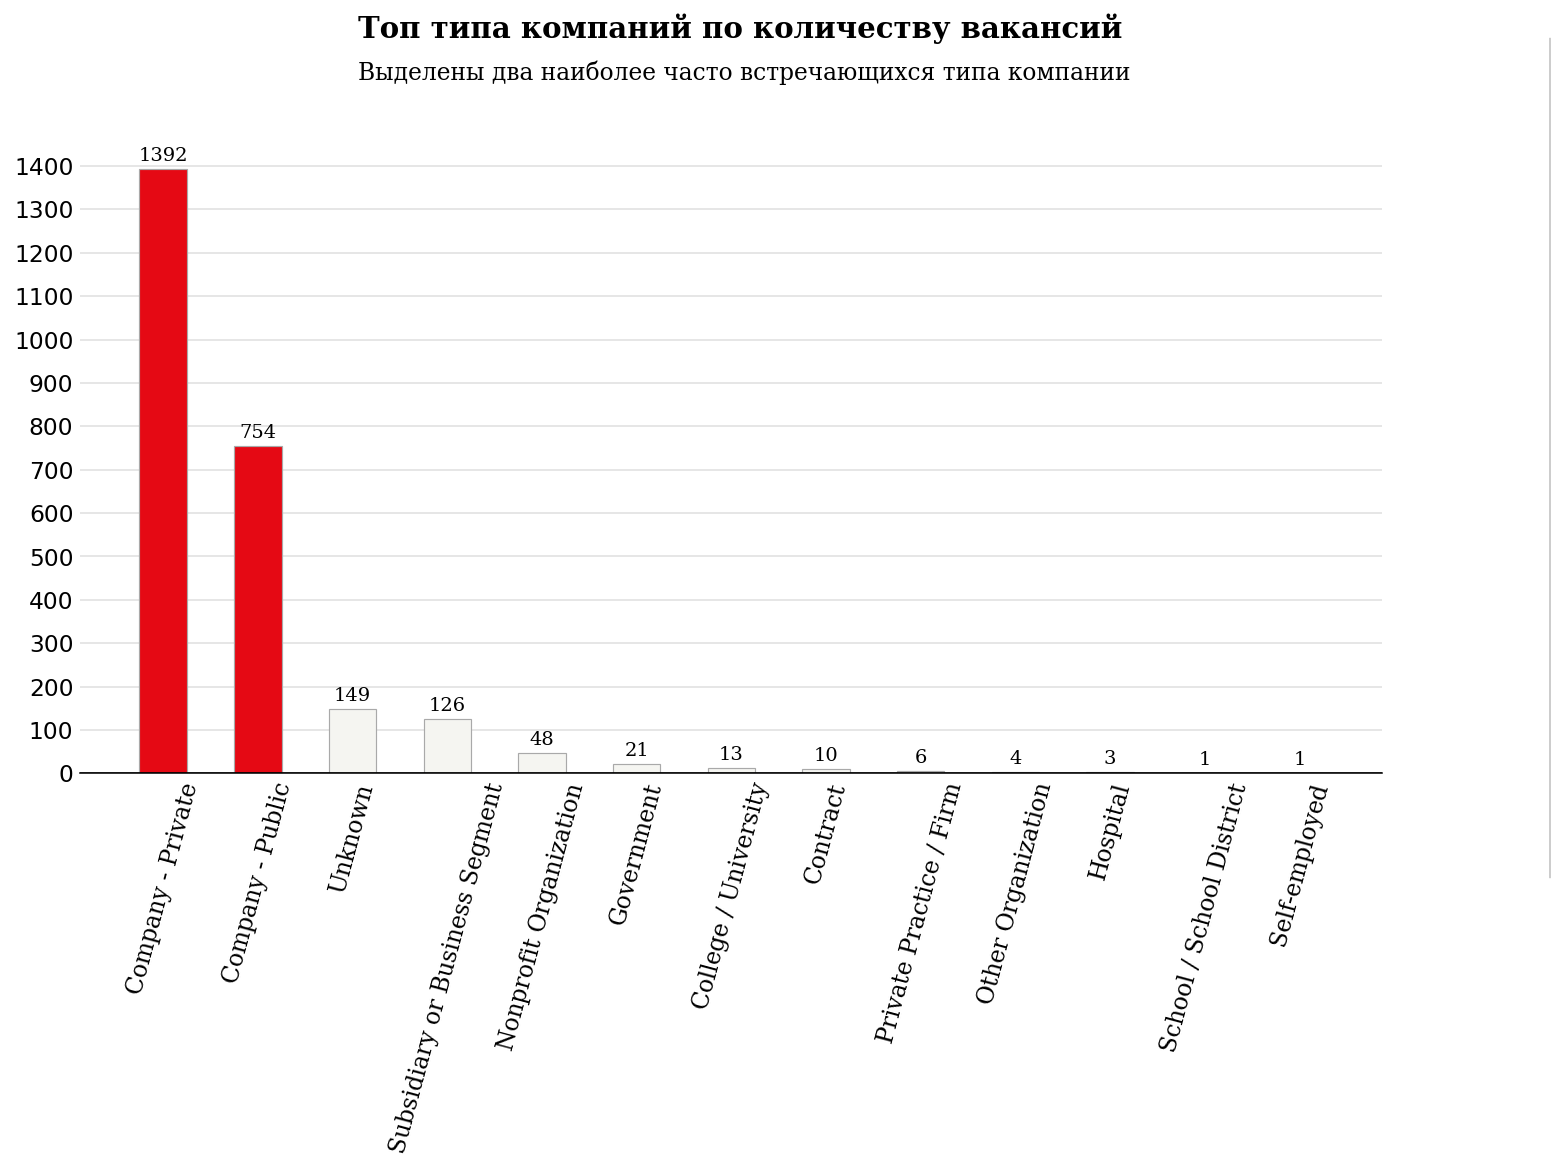

In [18]:
data = df.groupby('type_of_ownership')['count'].sum().sort_values(ascending=False)

color_map = ['#f5f5f1' for _ in range(15)]
color_map[0] = color_map[1] =  '#e50914' 

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 30), 
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')



for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
ax.set_xticklabels(data.index, fontfamily='serif', rotation=75)


fig.text(0.29, 1, 'Топ типа компаний по количеству вакансий', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.29, 0.95, 'Выделены два наиболее часто встречающихся типа компании', fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 1500, 100) 
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)


l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

## График популярности по секторам работы


Заменим значение '-1' в столбце 'industry' на 'Unknown'

In [19]:
df['industry'] = df['industry'].replace('-1', 'Unknown')

Посмотрим топ 10 самых популярных секторов

In [20]:
data = df.groupby('industry')['count'].sum().sort_values(ascending=False)
data

industry
Unknown                            378
IT Services                        355
Computer Hardware & Software       244
Staffing & Outsourcing             202
Internet                           145
                                  ... 
Music Production & Distribution      1
Gas Stations                         1
Miscellaneous Manufacturing          1
Food Production                      1
Pet & Pet Supplies Stores            1
Name: count, Length: 84, dtype: int64

Построим график популярности вакансий по секторам работы, но без значения Unknown

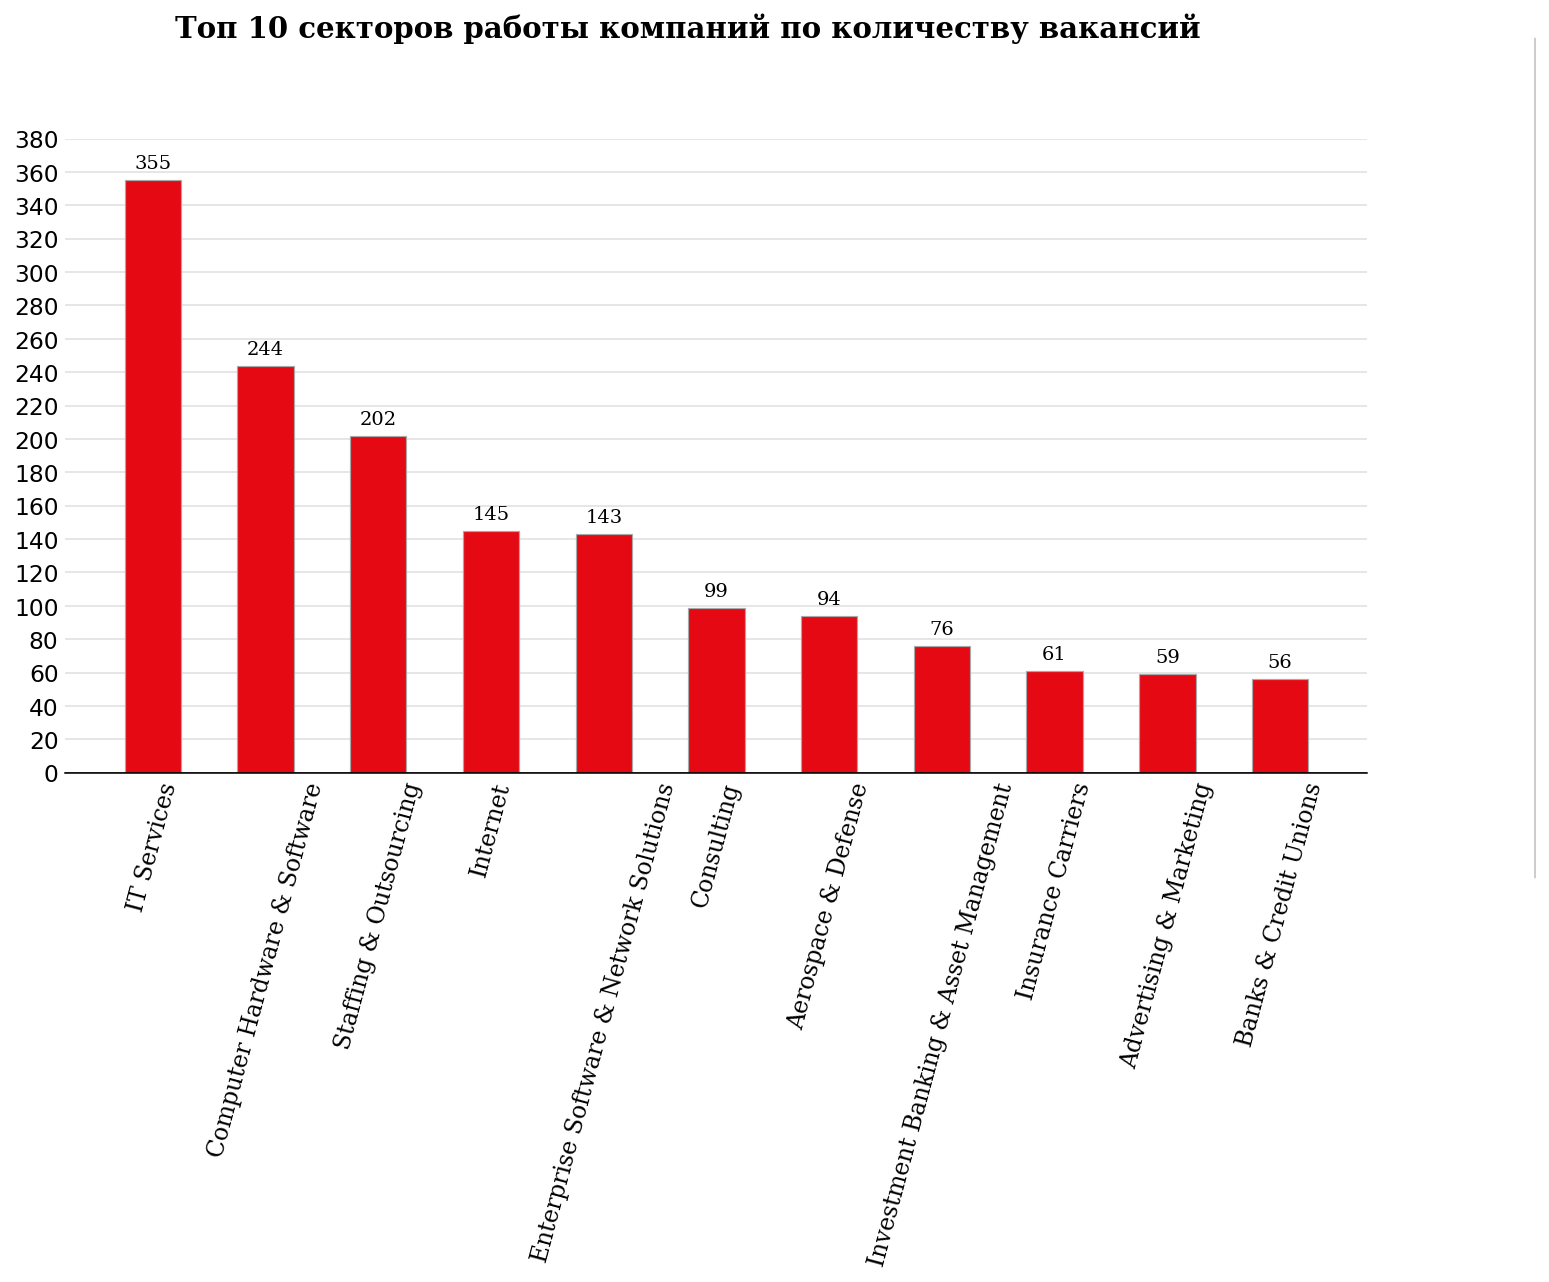

In [21]:
data = df.groupby('industry')['count'].sum().sort_values(ascending=False)[1:12]

color_map = ['#e50914' for _ in range(15)]

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 10), 
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')



for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    

ax.set_xticklabels(data.index, fontfamily='serif', rotation=75)


fig.text(0.19, 1, 'Топ 10 секторов работы компаний по количеству вакансий', fontsize=15, fontweight='bold', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 400, 20) 
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)


l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()


## График зависимости сектора работы и среднего уровня зарплат в них


In [22]:
df['salary_estimate'].value_counts()

$60K-$109K (Glassdoor est.)    62
$75K-$135K (Glassdoor est.)    44
$82K-$130K(Employer est.)      42
$52K-$85K (Glassdoor est.)     32
$53K-$100K (Glassdoor est.)    32
                               ..
$70K-$138K (Glassdoor est.)     8
$37K-$75K (Glassdoor est.)      8
$58K-$94K (Glassdoor est.)      7
$57K-$92K (Glassdoor est.)      7
$57K-$97K (Glassdoor est.)      5
Name: salary_estimate, Length: 91, dtype: int64

Посчитаем среднюю зарплату. Вычленим ее из столбца 'salary_estimate'.

In [23]:
df['salary_mean'] = [re.findall(r"(\d+)", col) for col in df['salary_estimate']]
df['salary_min'] = [df['salary_mean'][i][0] for i in range(len(df))]
df['salary_max'] = [df['salary_mean'][i][1] for i in range(len(df))]
df['salary_min'] = df['salary_min'].astype('int32')
df['salary_max'] = df['salary_max'].astype('int32')
df['salary_mean'] = ((df['salary_max']+df['salary_min'])/2).astype('int32')

Выведем группировку по сектору работы и по средней зарплате в секторе

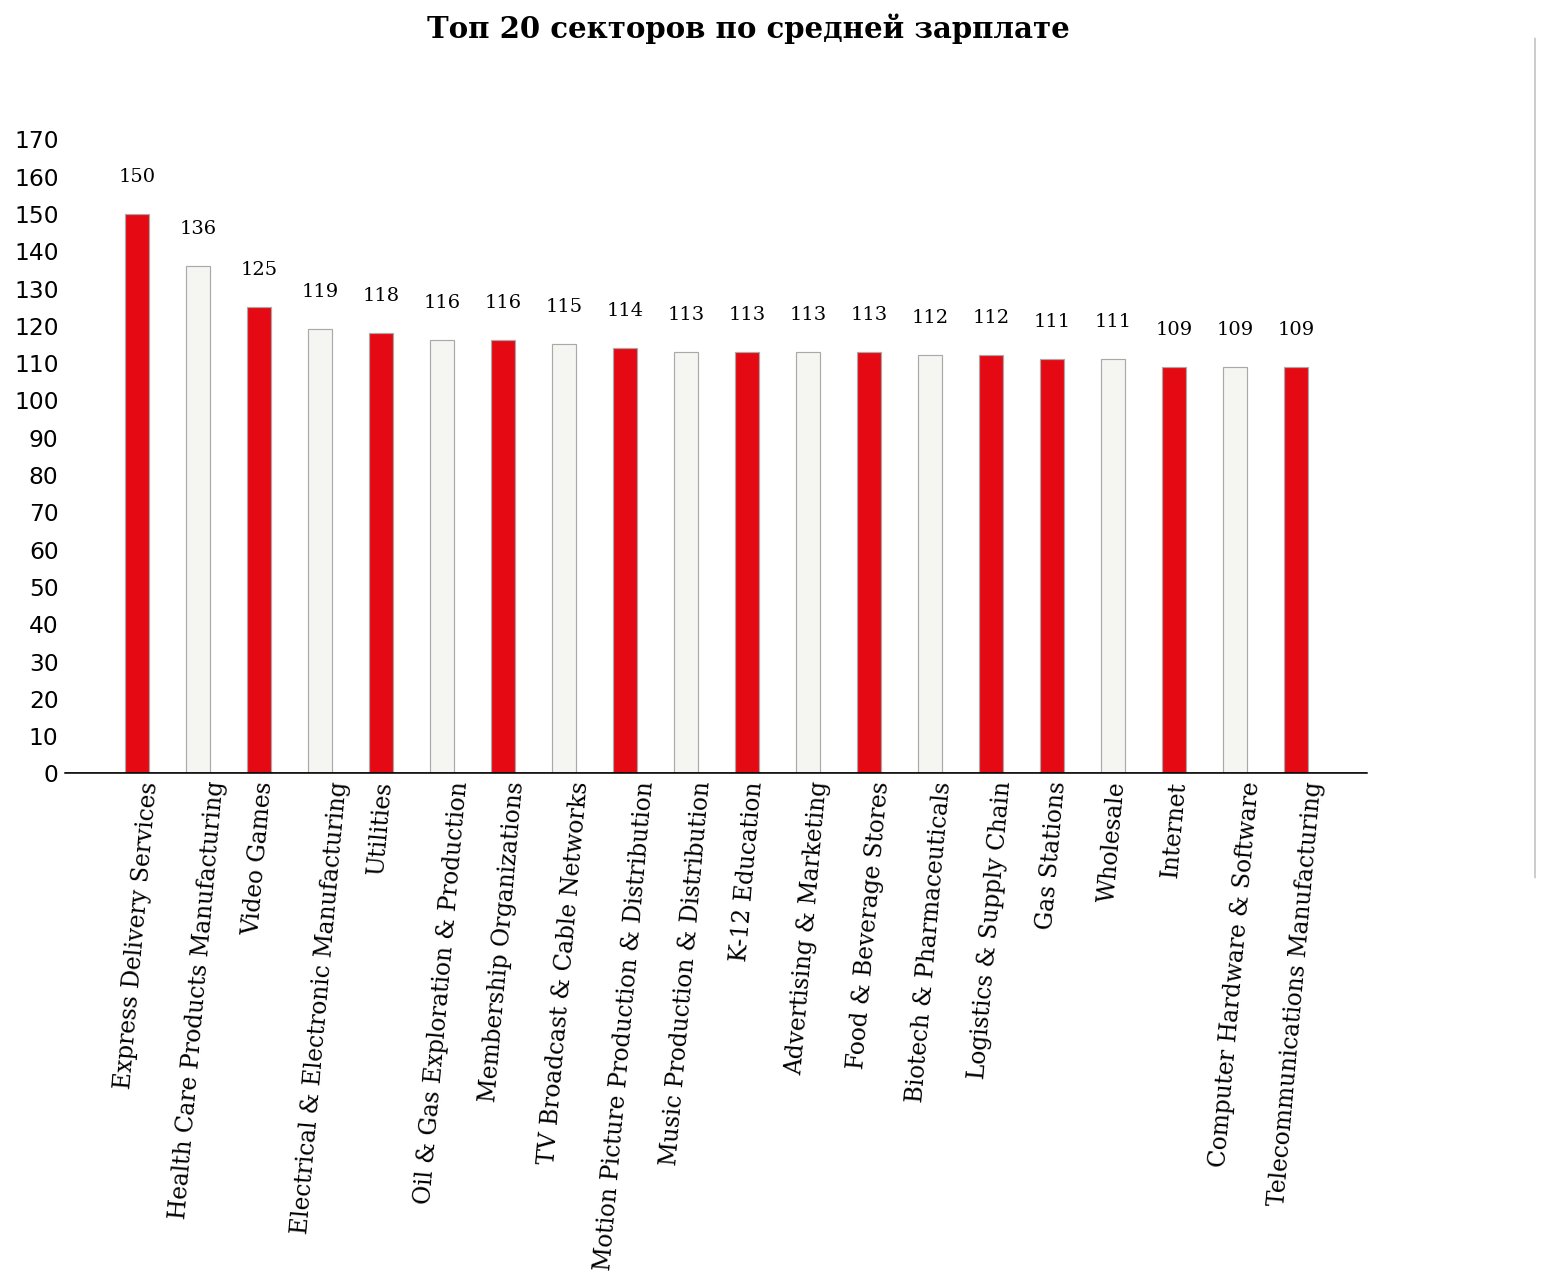

In [24]:
data = df.groupby('industry')['salary_mean'].mean().round().astype('int32').sort_values(ascending = False).head(20)


for i in range(1, 15, 2):
    color_map[i] = '#f5f5f1'
    
#for i in range(0, 8, 2):
    #color_map[i] = '#221f1f' 

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, width=0.4, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)


for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 10), 
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')


for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)


ax.set_xticklabels(data.index, fontfamily='serif', rotation=85)


fig.text(0.34, 1, 'Топ 20 секторов по средней зарплате', fontsize=15, fontweight='bold', fontfamily='serif')

grid_y_ticks = np.arange(0, 180, 10) 
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)


plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)


l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

## Гистограмма распределения рейтинга компаний

Выведем рейтинг компаний

In [25]:
df.groupby('rating')['count'].sum().sort_values(ascending = False).head(10)

rating
-1.0    234
 3.9    213
 3.8    195
 3.6    182
 3.7    166
 4.0    142
 3.5    133
 4.1    132
 5.0    124
 3.4    109
Name: count, dtype: int64

Видимо рейтинг -1 значит его отсутствие. Просто не будем выводить этот рейтинг на графике

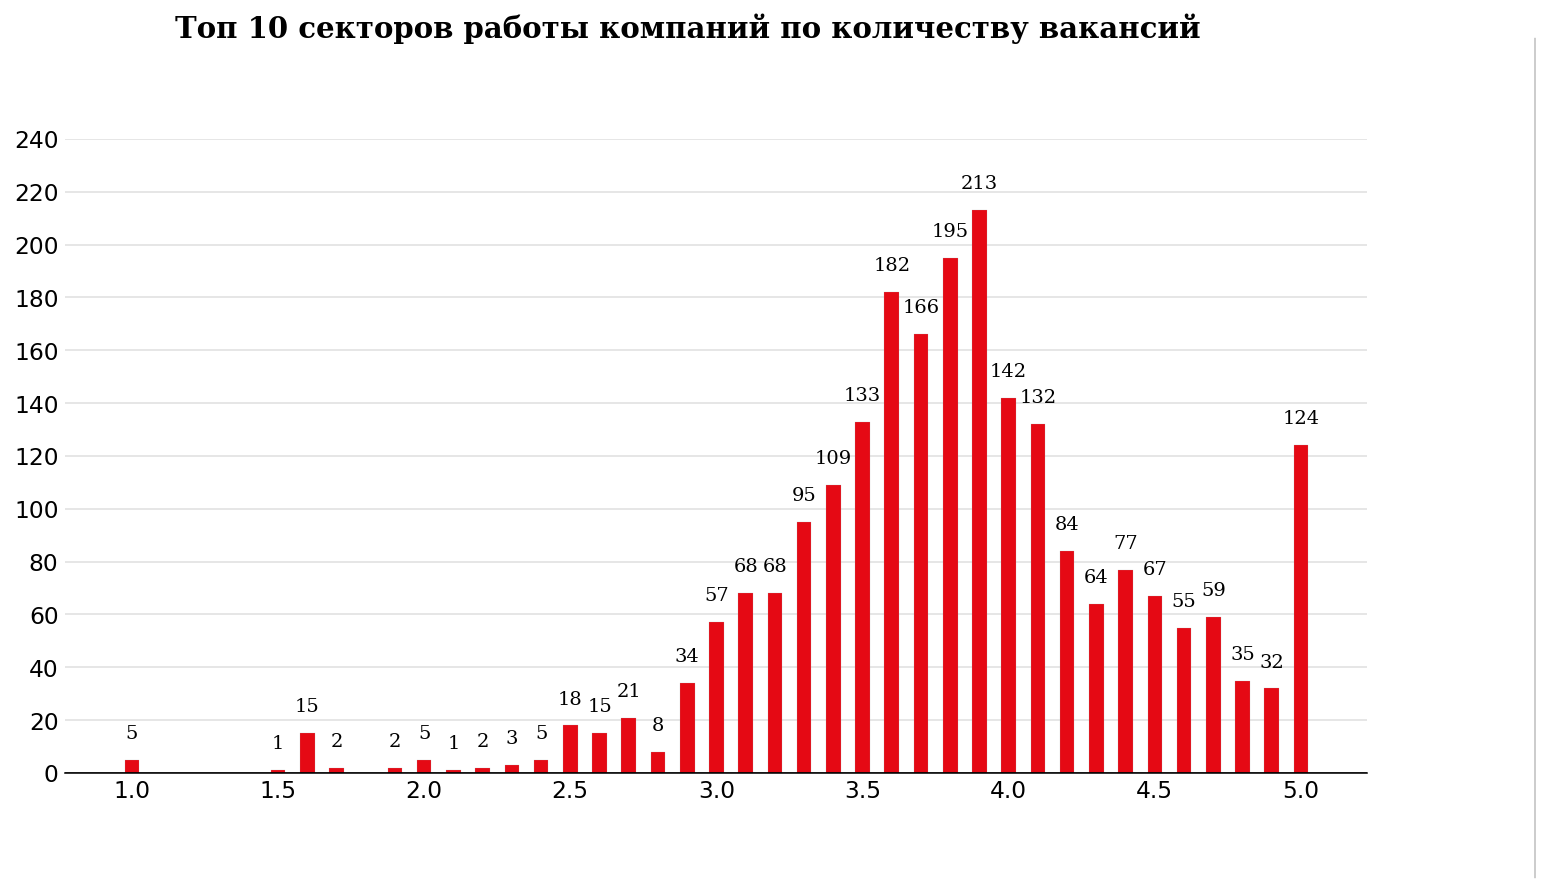

In [26]:

data = df.groupby('rating')['count'].sum().sort_values(ascending=False).tail(36)#.head(10)

color_map = ['#e50914' for _ in range(15)]

fig, ax = plt.subplots(1,1, figsize=(12, 6))

ax.bar(data.index, data, width=0.05, 
       edgecolor='darkgray',
       linewidth=0.1,color=color_map)

for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 10), 
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')



for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    

#ax.set_xticklabels(data.index) #data.index, fontfamily='serif', rotation=75)


fig.text(0.19, 1, 'Топ 10 секторов работы компаний по количеству вакансий', fontsize=15, fontweight='bold', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 250, 20) 
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)


l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()


## Построим график средних зарплат по популярным компаниям

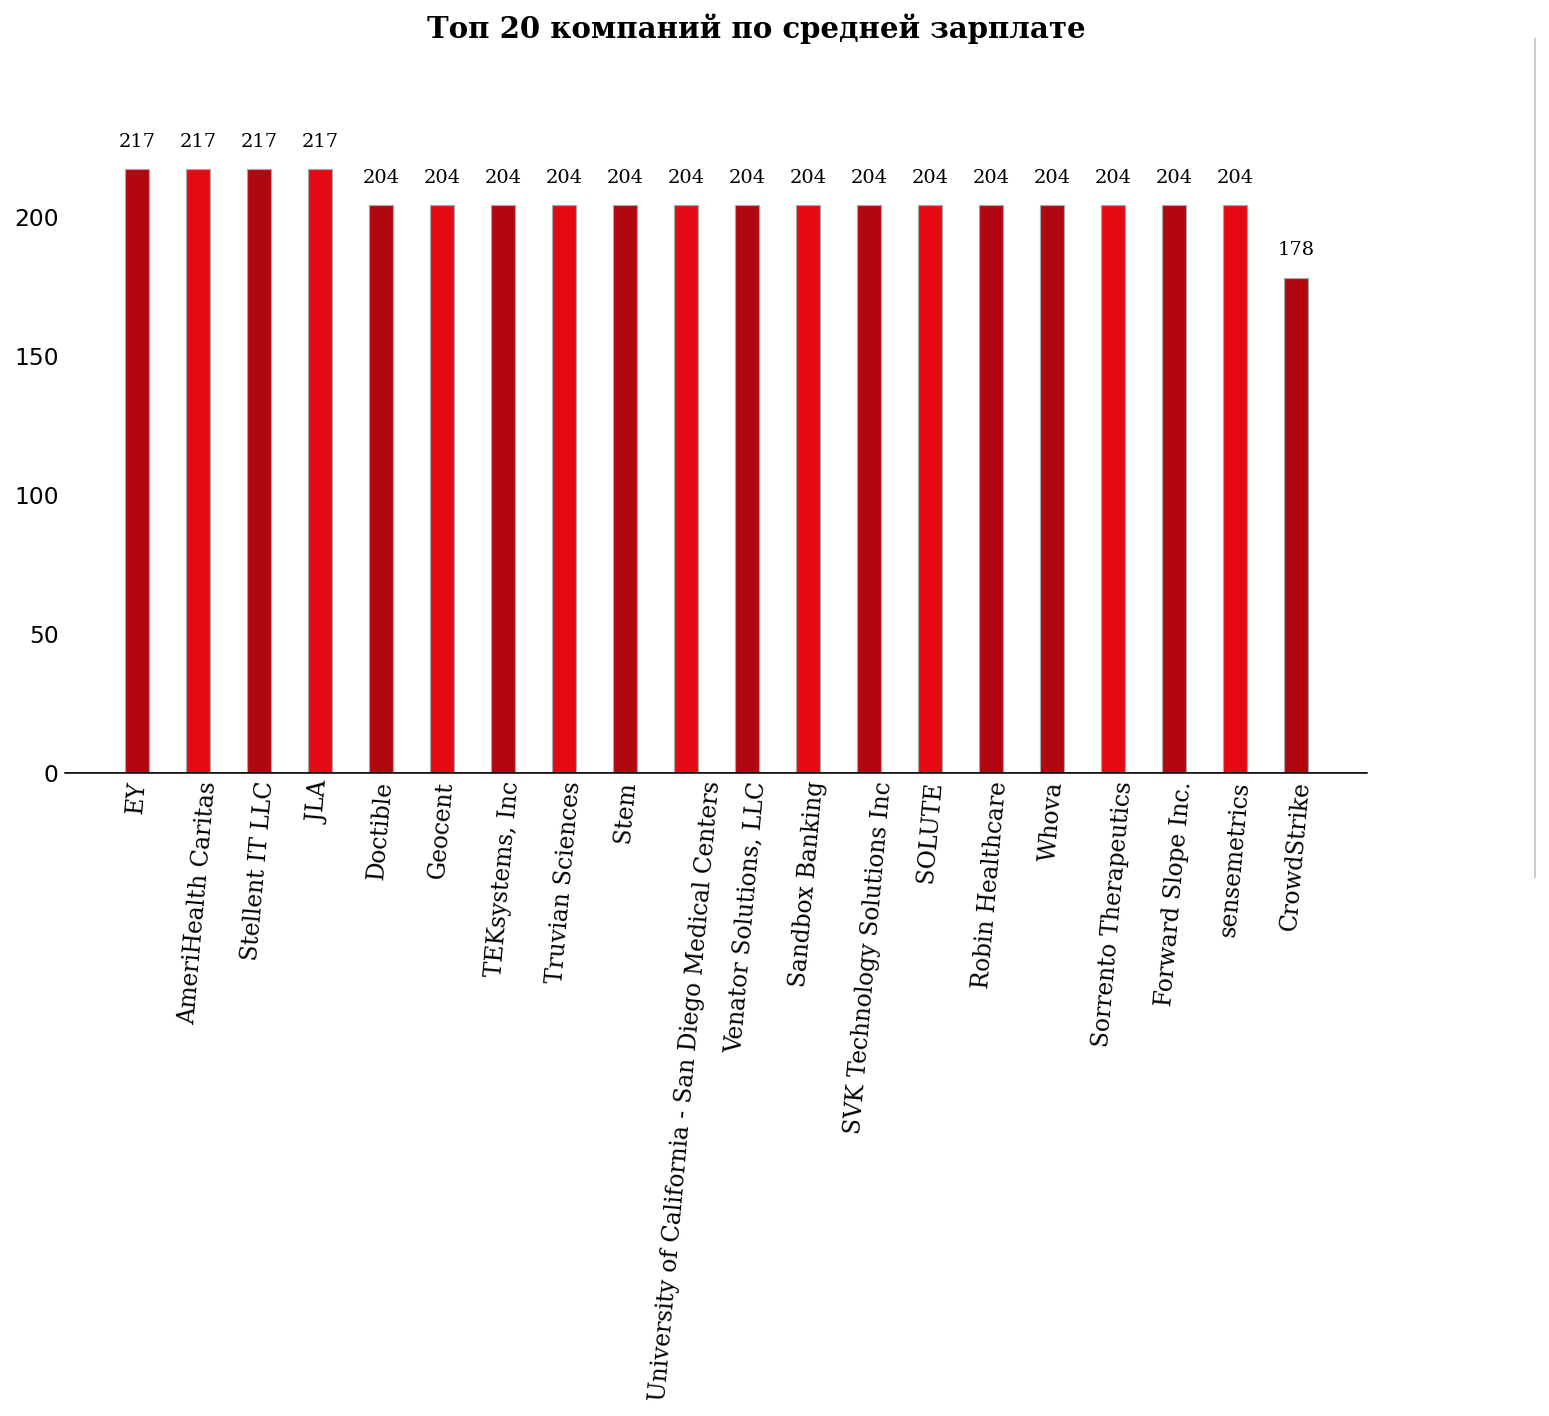

In [27]:
data = df.groupby('company_name')['salary_mean'].mean().round().astype('int32').sort_values(ascending = False).head(20)

    
for i in range(0, 16, 2):
    color_map[i] = '#b20710' 

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, width=0.4, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

#annotations
for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 10), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')


for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    

ax.set_xticklabels(data.index, fontfamily='serif', rotation=85)


fig.text(0.34, 1, 'Топ 20 компаний по средней зарплате', fontsize=15, fontweight='bold', fontfamily='serif')

grid_y_ticks = np.arange(0, 250, 50) 
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

## Облако тегов из популярных слов в описаниях вакансий

In [28]:
stop_words = set(stopwords.words('english')) 
len(stop_words)

179

Разобьем предложения на слова, лемматизируя и токенизируя их.

In [29]:
def lem(df): 
    # приведение к нижнему регистру
    some_text = df.lower()
    # очистка от лишних символов
    some_text =  " ".join(re.sub(r'[^a-zA-Z ]', ' ', some_text).split())
    # разбиение на отдельные слова
    word_list = nltk.word_tokenize(some_text)
    #print(word_list)
    #tokens_without_sw = [word for word in word_list if not word in stopwords.words()] 
    #print(tokens_without_sw) 
    return word_list     

In [30]:
%%time

df['lemm_job'] = df['job_description'].apply(lem)
df.head(4)

CPU times: total: 3.75 s
Wall time: 3.73 s


,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,easy_apply,count,salary_mean,salary_min,salary_max,lemm_job
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1,1,115,80,150,"[company, description, sagence, is, a, managem..."
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1,1,115,80,150,"[key, responsibilities, architect, build, and,..."
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1,1,115,80,150,"[overview, job, description, position, overvie..."
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position\n\n\nThis position will sup...,4.8,Jane Street,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1,1,115,80,150,"[about, the, position, this, position, will, s..."


In [31]:
lemma_purpose = []
for ind in df['lemm_job']: # пройдемся по всем значениям 
    lemma_purpose += ind # сложим лемматизации в каждой строке
        
words = (Counter(lemma_purpose))    
print(words)

Counter({'and': 69124, 'to': 34826, 'the': 28923, 'of': 26877, 'data': 22447, 'in': 20695, 'with': 19107, 'a': 19102, 'experience': 14965, 'for': 13154, 'or': 12104, 'is': 8580, 'our': 8036, 'you': 7735, 'we': 7637, 'on': 7508, 'as': 7298, 'work': 6194, 'are': 5748, 'will': 5555, 'be': 5390, 'that': 5310, 'an': 5124, 's': 5088, 'team': 4887, 'business': 4859, 'development': 4336, 'design': 4263, 'years': 4189, 'engineering': 4184, 'systems': 4160, 'skills': 4029, 'software': 4010, 'solutions': 3652, 'technical': 3618, 'this': 3600, 'at': 3599, 'engineer': 3399, 'have': 3228, 'knowledge': 3166, 'working': 3143, 'other': 3061, 'support': 3033, 'all': 2999, 'by': 2972, 'ability': 2956, 'requirements': 2896, 'technology': 2847, 'management': 2834, 'from': 2809, 'job': 2797, 'tools': 2743, 'required': 2662, 'new': 2641, 'cloud': 2553, 'your': 2541, 'including': 2455, 'services': 2433, 'technologies': 2405, 'environment': 2369, 'sql': 2358, 'strong': 2323, 'information': 2275, 'using': 2267,

In [32]:
len(words.most_common())

20130

In [33]:
popular_words_in_vacancy = [(words.most_common()[i][0]) for i in range(len(words.most_common())) if len(words.most_common()[i][0]) > 4]

In [34]:
popular_words_in_vacancy[:15]

['experience',
 'business',
 'development',
 'design',
 'years',
 'engineering',
 'systems',
 'skills',
 'software',
 'solutions',
 'technical',
 'engineer',
 'knowledge',
 'working',
 'other']

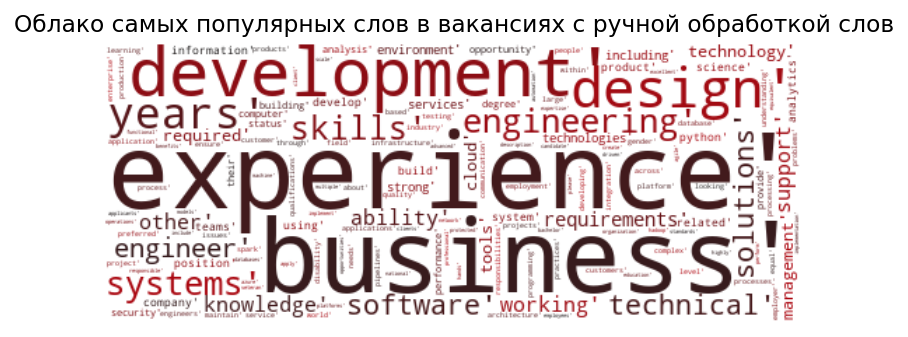

In [35]:
# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])

text = str(popular_words_in_vacancy[:155])

wordcloud = WordCloud(background_color = 'white', width = 500,  height = 200,colormap=cmap, max_words = 150).generate(text)


plt.figure( figsize=(5,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Облако самых популярных слов в вакансиях с ручной обработкой слов')
plt.tight_layout(pad=0)
plt.show()

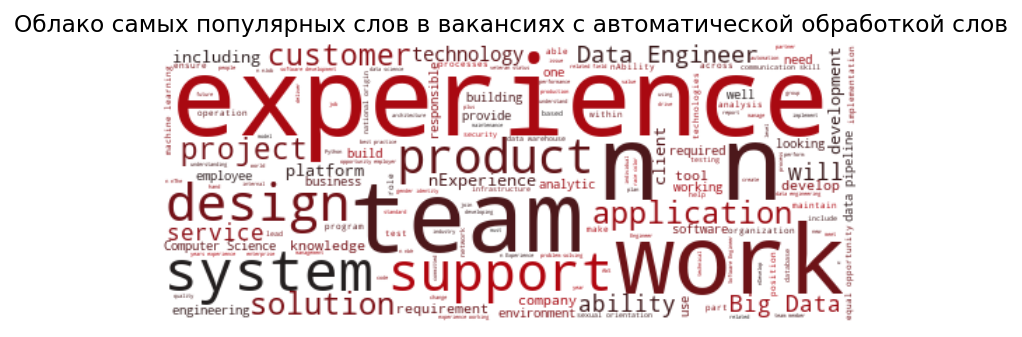

In [36]:
# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])

text = str(list(df['job_description'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')

wordcloud = WordCloud(background_color = 'white', width = 500,  height = 200,colormap=cmap, max_words = 150).generate(text)


plt.figure( figsize=(5,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Облако самых популярных слов в вакансиях с автоматической обработкой слов')
plt.tight_layout(pad=0)
plt.show()

Видим, что облако слов отличается в случае ручной и автоматической обработок, но основные слова и общая тональность все равно видны.

# Вывод


В настоящем ноутбуке были предприняты попытки более продвинуто использовать библиотеки визуализации данных. 

Все поставленные в начале задачи были выполнены.